<a href="https://colab.research.google.com/github/EkaFitriRamadani/MachineLearning/blob/main/AssociationRulesApriory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load library yang akan digunakan
import pandas as pd 
import numpy as np
import networkx as nx 
import plotly.express as px
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns 

warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [ ]:
# load dataset
df = pd.read_csv("/content/sample_data/bread_basket.csv")
print(df)

       Transaction           Item         date_time period_day weekday_weekend
0                1          Bread  30-10-2016 09:58    morning         weekend
1                2   Scandinavian  30-10-2016 10:05    morning         weekend
2                2   Scandinavian  30-10-2016 10:05    morning         weekend
3                3  Hot chocolate  30-10-2016 10:07    morning         weekend
4                3            Jam  30-10-2016 10:07    morning         weekend
...            ...            ...               ...        ...             ...
20502         9682         Coffee  09-04-2017 14:32  afternoon         weekend
20503         9682            Tea  09-04-2017 14:32  afternoon         weekend
20504         9683         Coffee  09-04-2017 14:57  afternoon         weekend
20505         9683         Pastry  09-04-2017 14:57  afternoon         weekend
20506         9684      Smoothies  09-04-2017 15:04  afternoon         weekend

[20507 rows x 5 columns]


In [ ]:
# melihat 5 baris pertama dari data
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori

def encoder(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

apriori_data = df.groupby(['Transaction','Item'])['Item'].count().reset_index(name ='Count')
apriori_basket = apriori_data.pivot_table(index = 'Transaction', columns = 'Item', values = 'Count', aggfunc = 'sum').fillna(0)
apriori_basket_set = apriori_basket.applymap(encoder)
apriori_basket_set.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
f_items = apriori(apriori_basket_set, min_support = 0.05, use_colnames = True)
f_items

,support,itemsets
0,0.327205,(Bread)
1,0.103856,(Cake)
2,0.478394,(Coffee)
3,0.054411,(Cookies)
4,0.058320,(Hot chocolate)
5,0.061807,(Medialuna)
6,0.086107,(Pastry)
7,0.071844,(Sandwich)
8,0.142631,(Tea)
9,0.090016,"(Bread, Coffee)"


In [ ]:
apriori_rules = association_rules(f_items, metric = 'lift', min_threshold = 0.05)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
0,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561
1,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905


In [ ]:
f_items = apriori(apriori_basket_set, min_support = 0.01, use_colnames = True)
f_items

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Coffee, Toast)"
57,0.014369,"(Sandwich, Tea)"
58,0.010037,"(Bread, Coffee, Cake)"
59,0.011199,"(Pastry, Coffee, Bread)"


In [ ]:
apriori_rules = association_rules(f_items, metric = 'lift', min_threshold = 0.01)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
49,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
36,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
40,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
3,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
...,...,...,...,...,...,...,...,...,...
59,(Bread),"(Coffee, Cake)",0.327205,0.054728,0.010037,0.030675,0.560497,-0.007870,0.975186
66,(Coffee),"(Pastry, Bread)",0.478394,0.029160,0.011199,0.023410,0.802807,-0.002751,0.994112
48,(Coffee),(Spanish Brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682
60,(Coffee),"(Bread, Cake)",0.478394,0.023349,0.010037,0.020981,0.898557,-0.001133,0.997581


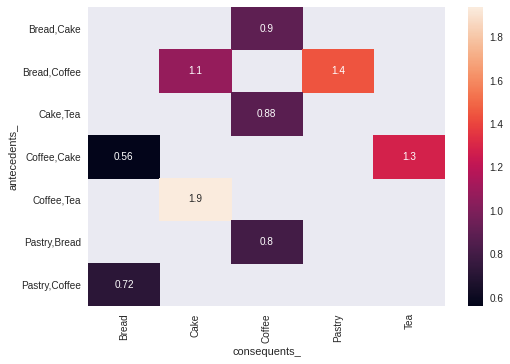

In [ ]:
# melihat visualisasi data
apriori_rules['lhs_items'] = apriori_rules['antecedents'].apply(lambda x:len(x) )
apriori_rules[apriori_rules['lhs_items']>1].sort_values('lift', ascending=False).head()
apriori_rules['antecedents_'] = apriori_rules['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_rules['consequents_'] = apriori_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = apriori_rules[apriori_rules['lhs_items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()